## Use barcharts and heatmaps to visualize patterns in your data
IGN Game Reviews provide scores from experts for the most recent game releases, ranging from 0 (Disaster) to 10 (Masterpiece).
<img src="https://i.imgur.com/Oh06Fu1.png">




## Load the data
1. Read the IGN data file into a dataframe named `ign_scores`.  
2. Use the `"Platform"` column to label the rows.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IGN="https://raw.githubusercontent.com/csbfx/advpy122-data/master/ign_scores.csv"
# Read the data from the URL
ign_scores = pd.read_csv(IGN)

# Set the 'Platform' column as the index
ign_scores.set_index('Platform', inplace=True)

# Show the first few rows of the DataFrame
print(ign_scores.head())

                    Action  Action, Adventure  Adventure  Fighting  \
Platform                                                             
Dreamcast         6.882857           7.511111   6.281818  8.200000   
Game Boy Advance  6.373077           7.507692   6.057143  6.226316   
Game Boy Color    6.272727           8.166667   5.307692  4.500000   
GameCube          6.532584           7.608333   6.753846  7.422222   
Nintendo 3DS      6.670833           7.481818   7.414286  6.614286   

                  Platformer    Puzzle       RPG    Racing   Shooter  \
Platform                                                               
Dreamcast           8.340000  8.088889  7.700000  7.042500  7.616667   
Game Boy Advance    6.970588  6.532143  7.542857  6.657143  6.444444   
Game Boy Color      6.352941  6.583333  7.285714  5.897436  4.500000   
GameCube            6.665714  6.133333  7.890909  6.852632  6.981818   
Nintendo 3DS        7.503448  8.000000  7.719231  6.900000  7.033333   

    

## Problem 1 - (1 point)
Use the dataframe ign_scores and write one line of code to determine the highest score received by any kind of games on the Wii platform?

In [3]:
highest_score_wii = ign_scores.loc['Wii'].max()
print(highest_score_wii)


7.410344827586206


## Problem 2 - (1 point)
Use the dataframe `ign_scores` to determine which genre has the lowest score for the `PlayStation Vita` platform.

In [5]:
lowest_score_ps_vita = ign_scores.loc['PlayStation Vita'].idxmin()
lowest_score_ps_vita

'Simulation'

## Problem 3 -  (2 points)
Your instructor's favorite video game has been Mario Kart Wii, a racing game released for the Wii platform in 2008. And, IGN agrees with her that it is a great game -- their rating for this game is a whopping 8.9! Inspired by the success of this game, your instructor is considering creating your very own racing game for the Wii platform. Perform the following analyses to help her determine which platform she should focus on.

1. Create a bar chart that shows the score for *Racing* games, for each platform. Your chart should have one bar for each platform. Provide a meaningful title to the plot.

2. Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, use the pandas to find out from the dataframe `ign_scores` which gaming platform is the best for racing game?

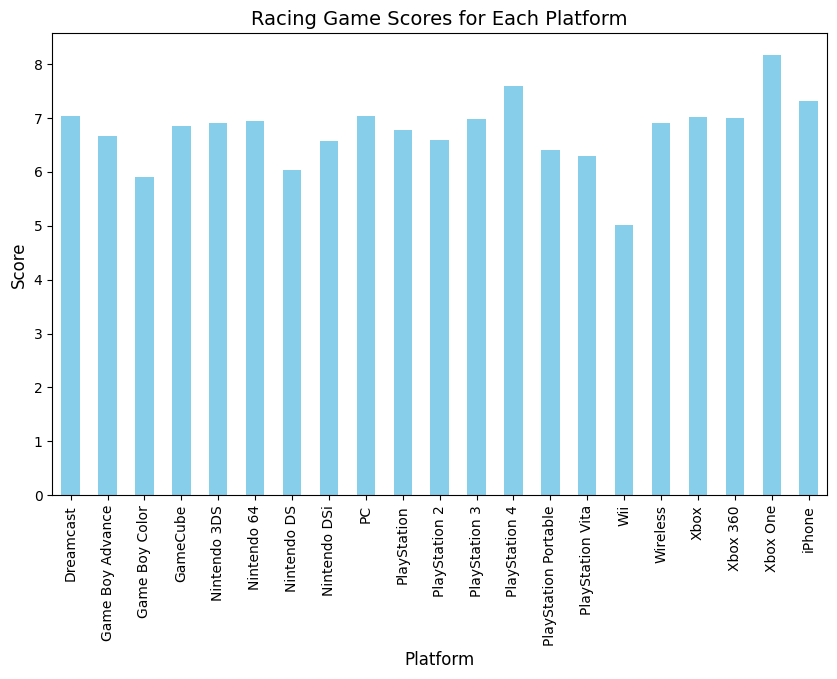

In [6]:
# (1 point)
# Set the width and height of the figure
import matplotlib.pyplot as plt

# Set the width and height of the figure
plt.figure(figsize=(10, 6))

# Plot the bar chart for Racing games on each platform
ign_scores['Racing'].plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Racing Game Scores for Each Platform', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Display the plot
plt.show()


In [7]:
## (1 point)
## Use ign_scores to determine which gaming platform is the best
## for racing game.

# Use pandas to determine which gaming platform is the best for Racing games
best_platform_for_racing = ign_scores['Racing'].idxmax()
print(f"The best platform for Racing games is: {best_platform_for_racing}")


The best platform for Racing games is: Xbox One


#### Problem 4 - (2 points)
Since your instructor's gaming interests are pretty broad, you can help her decide to use the IGN scores to determine the choice of genre and platform.

1. Create a heatmap using the IGN scores by genre and platform and include the scores in the cells of the heatmap.
2. Base on the heatmap, which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings? Write the answers in a markdown cell.

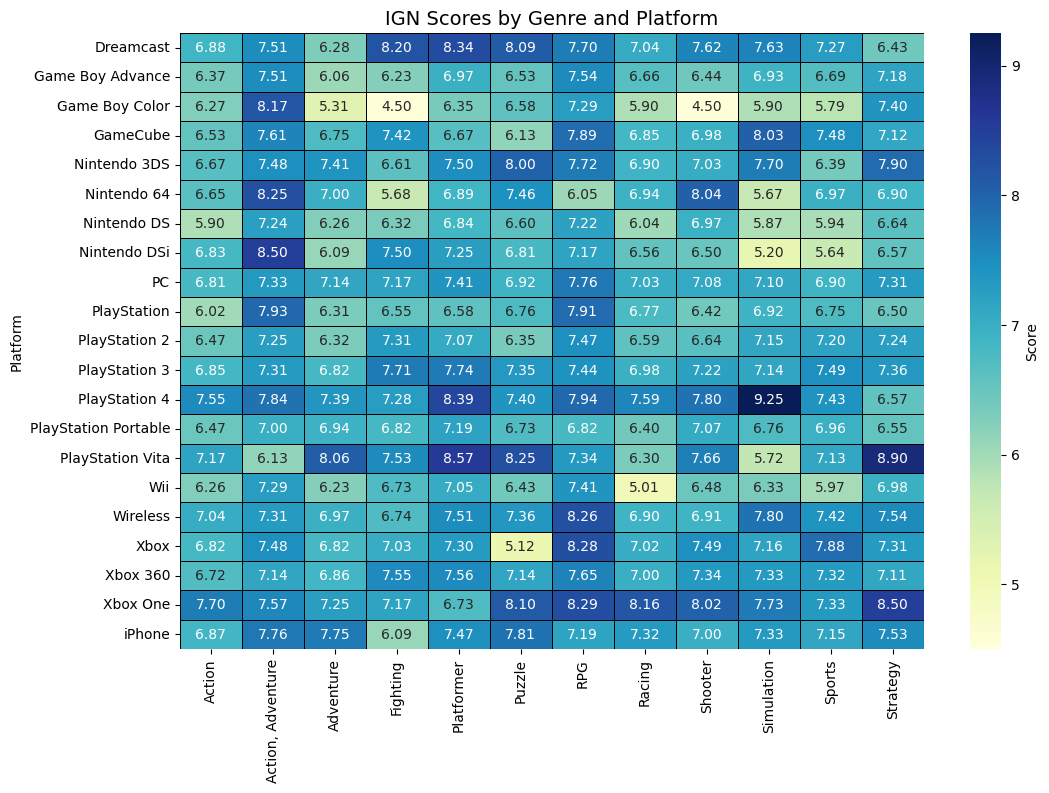

The combination with the highest average rating is: Xbox One with a score of 7.71
The combination with the lowest average rating is: Game Boy Color with a score of 6.16


In [10]:
## Create a heatmap
import seaborn as sns

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap for the IGN scores by genre and platform
sns.heatmap(ign_scores, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Score'},
            linewidths=0.5, linecolor='black')

# Set the title
plt.title('IGN Scores by Genre and Platform', fontsize=14)

# Display the heatmap
plt.show()

# Calculate the mean scores for each genre and platform
average_scores = ign_scores.mean(axis=1)

# Find the combination with the highest average score
highest_avg_combination = average_scores.idxmax()
highest_avg_score = average_scores.max()

# Find the combination with the lowest average score
lowest_avg_combination = average_scores.idxmin()
lowest_avg_score = average_scores.min()

# Print the results
print(f"The combination with the highest average rating is: {highest_avg_combination} with a score of {highest_avg_score:.2f}")
print(f"The combination with the lowest average rating is: {lowest_avg_combination} with a score of {lowest_avg_score:.2f}")



## Problem 5 - (4 points)
Use the Pokemon dataset to create a clustermap with color. First, filter the dataframe to only keep data with `Type 1` equals to following values: `Water`, `Normal`, `Grass`, `Bug` and `Psychic`. Annotate the dendrogram using different colors for these five different `Type 1` values. Use `Name` as the index.

pokemon_data is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

<ipython-input-11-8e10c532fee8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type 1 Color'] = filtered_data['Type 1'].map(type_colors)


<Figure size 1200x800 with 0 Axes>

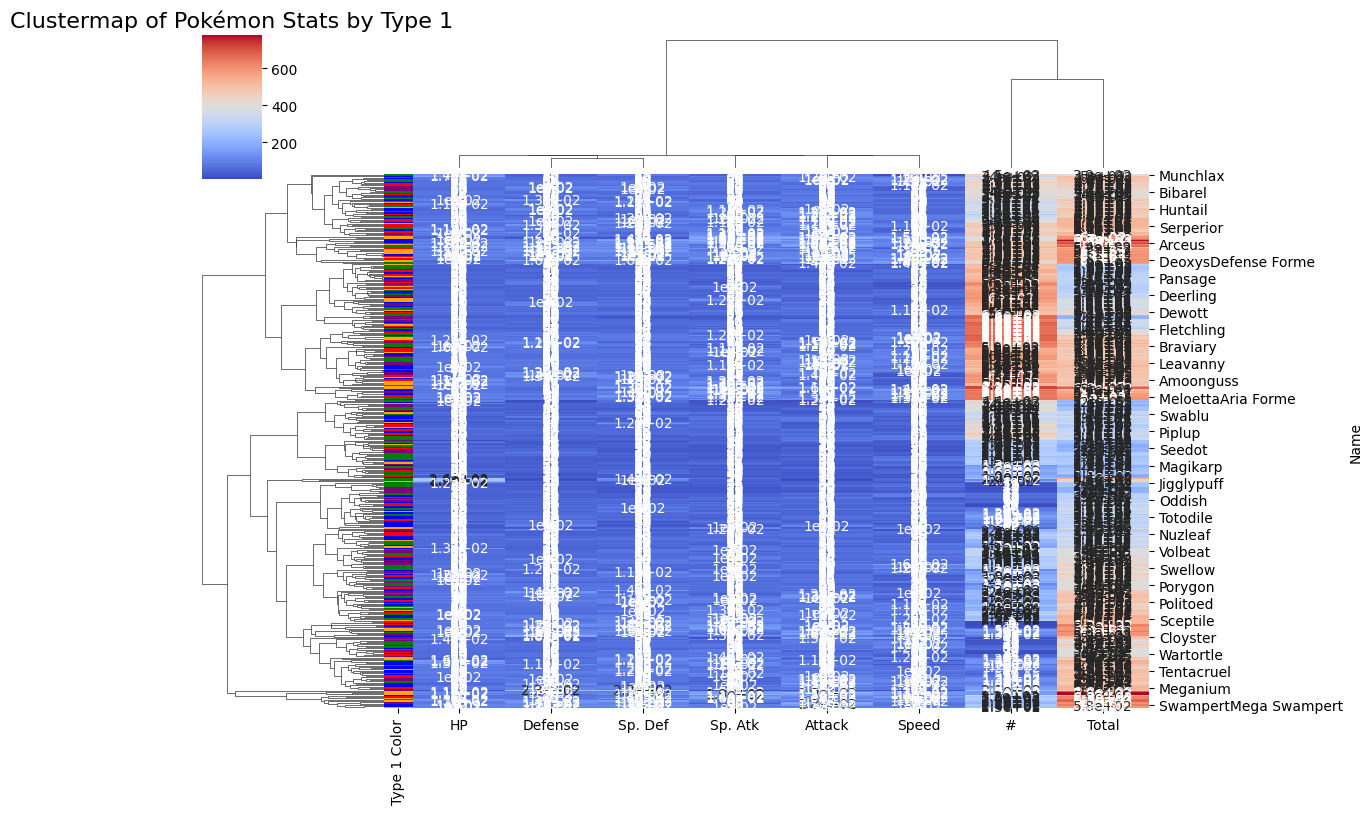

In [11]:
# Load the Pokémon dataset
pokemon_data = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv")

# Filter data to keep only rows where Type 1 is one of the specified values
filtered_data = pokemon_data[pokemon_data['Type 1'].isin(['Water', 'Normal', 'Grass', 'Bug', 'Psychic'])]

# Set 'Name' as the index for the dataframe
filtered_data.set_index('Name', inplace=True)

# Select numerical columns only for the clustermap (drop non-numerical columns)
numerical_data = filtered_data.drop(columns=['Type 1', 'Type 2', 'Legendary', 'Generation'])

# Map the colors for the "Type 1" values
type_colors = {'Water': 'blue', 'Normal': 'green', 'Grass': 'red', 'Bug': 'purple', 'Psychic': 'orange'}

# Create a new column for Type 1 colors
filtered_data['Type 1 Color'] = filtered_data['Type 1'].map(type_colors)

# Set up the clustermap with the numerical data
plt.figure(figsize=(12, 8))
sns.clustermap(numerical_data, cmap='coolwarm', annot=True, figsize=(12, 8),
               row_colors=filtered_data['Type 1 Color'])

# Add a title to the plot
plt.title('Clustermap of Pokémon Stats by Type 1', fontsize=16)

# Show the plot
plt.show()

